# Regresion lineal

Uno de los principales metodos de predicion es la regression lineal, en este caso 
se trata observar en la distribucion de los datos, cual es la mejor linea recta que 
es capaz de ayuda a predecir los resultados.

en este caso la ecuacion de la linea recta se basa como y = mx + b donde m y b 
son la respectiva pendiente y B es el desplazamiento.

cuando uno analiza un modelo siempre tiene que tratar de encontrar una ecuacion o funcion 
que sea capaz de determinar como los datos se comportan, para esto cuando los datos 
tienden a ser lineales, se trata de buscar la linea recta se se acerque mejor 
con la distribucion de los datos

M y B son hiper parametros que condicionan como el modelo se comporta 
para esto una de las formas que machine learning usa para encontrar estos valores de M y b 
es por el metodo de la curva.

este metodo nos ayuda a econtrar los errores con las muestras, para r bajando el error 
haicendo que el modelo se ajuste mas a los resultados experados

**Nota**: recordar que las maquina son muy veloces y hay que saber usar sus recursos
en este caso aplicando la curva podemos minimizar el error con un numero de interacciones

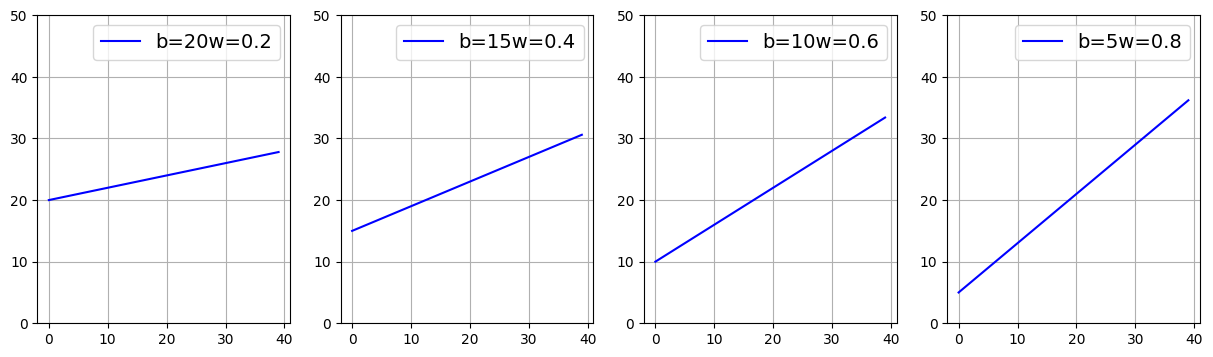

In [1]:
# Esta es una regression lineal desde cero

import matplotlib.pyplot as plt
import numpy as np

fig,axs = plt.subplots(1,4,figsize=(15,4))

X = np.array(range(40))
for fig,b,w in zip([0,1,2,3],[20,15,10,5],[0.2,0.4,0.6,0.8]):
    y = b + w*X
    axs[fig].plot(X,y,'b-',label='b=' + format(b)+'w='+format(w))
    axs[fig].set_ylim(bottom=0,top=50), axs[fig].legend();
    axs[fig].legend(prop={'size':14}); axs[fig].grid()

plt.show()

## loss 

Como dije anteriormente las maquina son muy buenas para realizar operaciones de forma rapida,
entonces como nosotros nos sabemos cual es la ecuacion de la linea recta mejor dicho la maquina,
lo que tiene que hacer esta es tratar de sacar una linea recta inicial, y ya con los valores de entrenamiento ir calculando el error para ver que tan lejos esta o no de la ecuacion objetiva.
para esto calculamos y de esta la derivamos con respecto a b y w indicando de que como cambiara estos 
hiper parametros atraves del tiempo

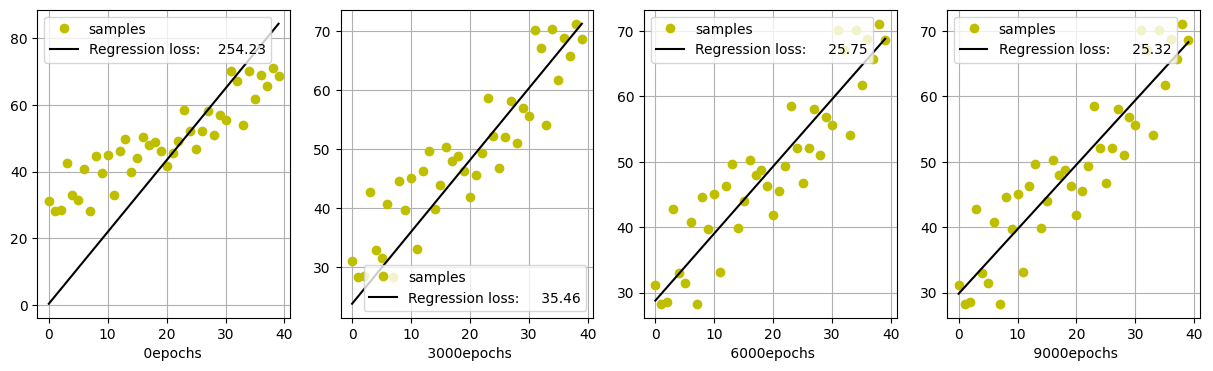

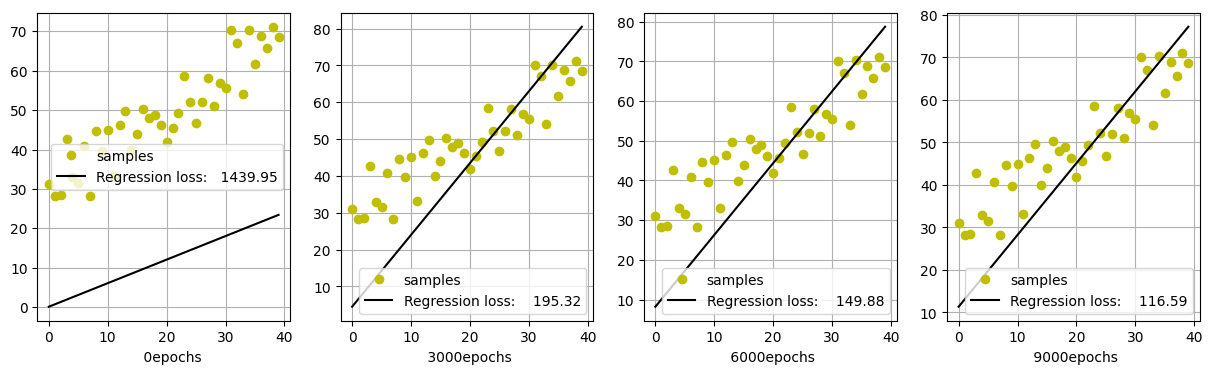

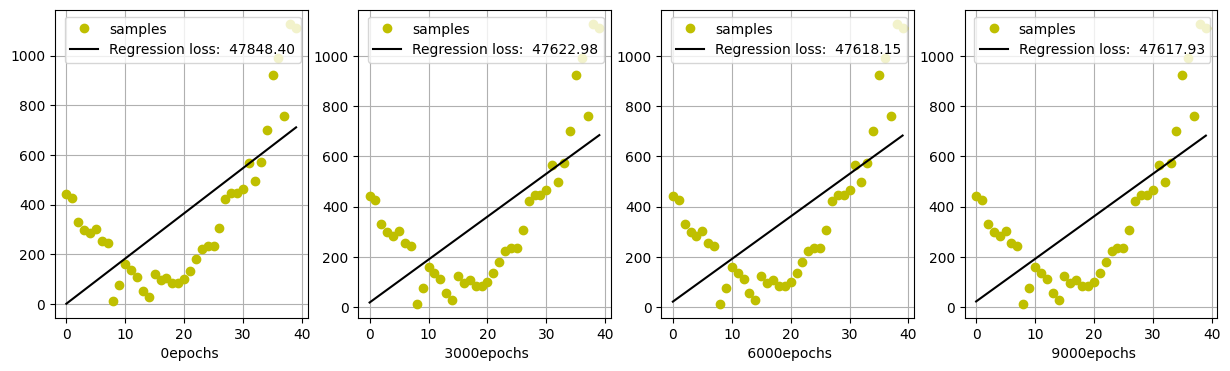

39.690945569112046
49.56264219849761


In [7]:
# Applicar la ecuacion de la linea recta y ir derivando el error con un nuemero de intetos
import random

# alpha es un coeficiente del error
def gradient_regression(X,y, alpha, b, w):
    dw = 0.0; db = 0.0
    for i in range(len(X)):
        aux = -2.0*(y[i] - (w*X[i] + b))
        db = db + aux
        dw = dw + X[i]*aux
    aux = 1.0/float(len(X))
    b = b - aux*db*alpha
    w = w - aux*dw*alpha
    return b,w

# Forma2 es mucho mas facil que hacer un ciclo
def gradient_regression2(X,y, alpha, b, w):
    aux = -2*(y-(w*X+b)).sum()
    b = b - alpha * aux/float(len(X))
    w = w - alpha*aux/float(len(X))
    return b,w

def prediction(x,b,w):
    return (w*x+b)

# Creamos las ecuacion para calcular la perdida
def loss(X,y,b,w):
    sum = 0
    for i in range(len(X)):
        sum += (y[i]- prediction(X[i],b,w))**2
    return sum/len(X)

# Voy a crear una funcion para graficar los valores
def plot(fig,X,y,b,w,ephochs):
    axs[fig].plot(X,y,'yo', label='samples')
    X = np.array(X)
    y_pred = w*X + b
    axs[fig].plot(X,y_pred,'k-',label='Regression loss: '+'{:9.2f}'.format(loss(X,y,b,w)))
    axs[fig].set_xlabel('{:5.0f}'.format(ephochs) + 'epochs')
    axs[fig].legend(); axs[fig].grid();
    return

def model(X,y,alpha,b,w,epochs):
    fig = 0
    for e in range(epochs):
        b,w = gradient_regression(X,y,alpha,b,w)
        if e % 3000 == 0:
            plot(fig,X,y,b,w,e)
            fig += 1
    
    return b,w

def create_samples(n):
    y = []; X = list(range(40))
    for i in range(len(X)):
        y.append(20 + X[i] + random.random()*20)
    return X,y

def create_sample2(n):
    X = np.array(list(range(40)))
    y = 20 + X + np.random.rand(40)*20
    return X,y


# ahora si mostramos como se comporta la regression cuando derivamos el error

X,y = create_sample2(40)
EPOCHS = 9001

# Primera regresion lineal con los valores correcto de alpha
fig,axs = plt.subplots(1,4, figsize=(15,4))
b, w = model(X,y,0.001, random.random(),random.random(), EPOCHS)

#Regression lineal con alpha mala
fig, axs = plt.subplots(1,4, figsize=(15,4))
model(X,y,0.0001,random.random(),random.random(),EPOCHS)
y = []

for i in range(len(X)):
    y.append((X[i]-10)**2+random.random()*20*abs(len(X)/2-i))

# Analzar como la perdida evoluciona
fig,axs = plt.subplots(1,4,figsize=(15,4))
model(X,y,0.001,random.random(),random.random(),EPOCHS)

plt.show()

print(prediction(10,b,w))
print(prediction(20,b,w))